In [3]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

In [5]:
#Importing the datasets
df_1 = pd.read_csv("/content/train_drcat_04.csv")
df_2 = pd.read_csv("/content/train_drcat_03.csv")
df_3 = pd.read_csv("/content/train_drcat_02.csv")
df_4 = pd.read_csv("/content/train_drcat_01.csv")

#df_1

In [6]:
df_1.head(1)

,essay_id,text,label,source,prompt,fold
0,E897534557AF,"In recent years, technology has had a profoun...",1,mistral7binstruct_v2,\nTask: Write an essay discussing the positive...,1


In [7]:
#Droping the unnecessary features
df_1 = df_1.drop(['essay_id',"prompt", "fold", "source"] , axis=1)

#df_2

In [8]:
df_2.head(2)

,essay_id,text,label,source,prompt,fold
0,6BB4BEB51A80,People can learn without making mistakes. Peop...,0,original_moth,Task: \n\nWrite an essay examining the ways in...,1
1,30A8FB981469,PHONES AND DRIVING\n\nIn this world in which w...,0,persuade_corpus,NaN,2


In [9]:
#Droping the unnecessary features
df_2 = df_2.drop(['essay_id',"prompt","source", "fold"] , axis=1)

#df_3

In [10]:
df_3.head(1)

,essay_id,text,label,source,prompt,fold
0,E0B86027C5C5,"Okay, here is my essay:\n\nWorking or doing th...",1,llama2_chat,Task: \n\n1. Research the benefits of working ...,1


In [11]:
#Droping the unnecessary features
df_3 = df_3.drop(['essay_id',"prompt","source", "fold"] , axis=1)

#df_4

In [12]:
df_4.head(1)

,text,label,source,fold
0,There are alot reasons to keep our the despise...,0,persuade_corpus,2


In [13]:
#Droping the unnecessary features
df_4 = df_4.drop(["source", "fold"] , axis=1)

In [ ]:
train_df = df_4.head(50)

In [14]:
#Concateinating all the dataset
train_df = pd.concat([df_1, df_2, df_3, df_4], ignore_index=True)

In [15]:
"There are only 2 unique values present in the dataset"
train_df.label.unique()

array([1, 0])

In [16]:
"Number of time unique values occur"
train_df.label.value_counts()

label
0    115372
1     44084
Name: count, dtype: int64

In [17]:
"Number of time unique values occur"
train_df.label.value_counts()

label
0    115372
1     44084
Name: count, dtype: int64

In [18]:
print("Total number of text generated by LLMs are: " , train_df.label.value_counts()[1] /(train_df.label.value_counts()[1]+train_df.label.value_counts()[0]) )

Total number of text generated by LLMs are:  0.2764649809351796


In [19]:
print("Total number of text written by humnas are: " , train_df.label.value_counts()[0] /(train_df.label.value_counts()[1]+train_df.label.value_counts()[0]) )

Total number of text written by humnas are:  0.7235350190648204


In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159456 entries, 0 to 159455
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159456 non-null  object
 1   label   159456 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


Text(0.5, 1.0, 'Distribution of Generated Text')

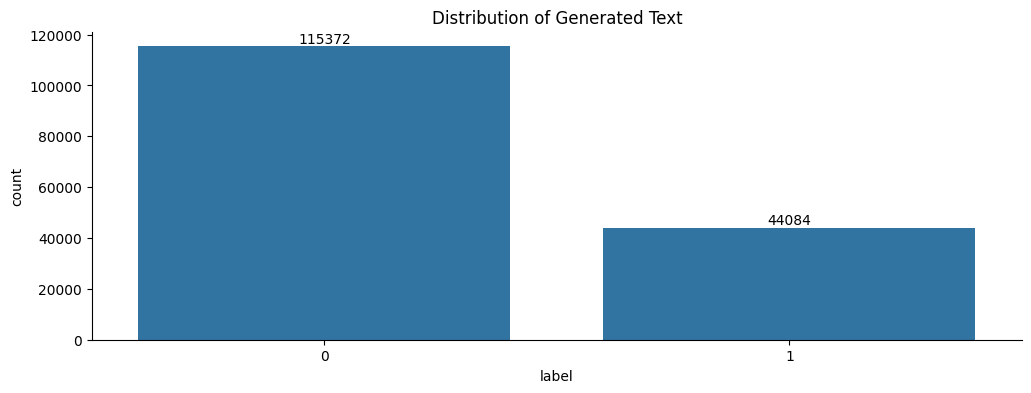

In [21]:
#Took ChatGPT's help
f, ax = plt.subplots(figsize=(12, 4))

sns.despine()
ax = sns.countplot(data=train_df,
                   x="label")

abs_values = train_df['label'].value_counts().values

ax.bar_label(container=ax.containers[0], labels=abs_values)

ax.set_title("Distribution of Generated Text")

In [ ]:
train_df["text_length"] = train_df["text"].apply(lambda x : len(x.split()))

In [ ]:
train_df.shape

(159456, 3)

In [ ]:
#Using only 3000 data because of limited RAM
train_df = train_df.iloc[: 3000]

In [ ]:
train_df.head(2)

,text,label,text_length
0,There are alot reasons to keep our the despise...,0,360
1,Driving smart cars that drive by themself has ...,0,444


Text(0.5, 0.98, 'Distribution of the length per essay - Train dataset')

<Figure size 4000x5000 with 0 Axes>

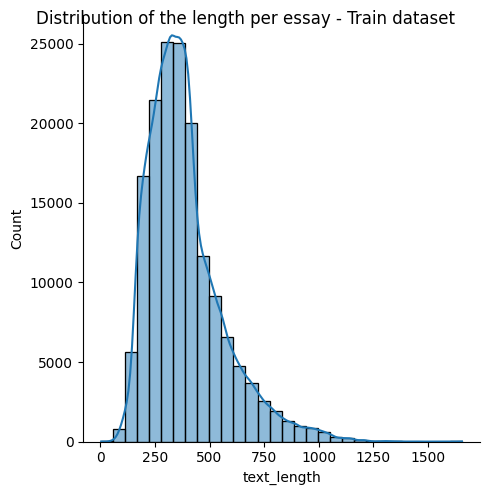

In [ ]:
fig = plt.figure(figsize=(40,50))
plot = sns.displot(data=train_df,
                 x="text_length", bins=30, kde=True)
plot.fig.suptitle("Distribution of the length per essay - Train dataset")

#Text encoding

#Class 0

In [ ]:
# Splitting the dataset based on the class
df_0 = train_df[train_df['label'] == 0]

In [ ]:
df_0.head(2)

,text,label,text_length
1,Should students participate in an extracurricu...,0,640
2,The electoral college is a symbol of mockery a...,0,542


In [ ]:
max(df_0.text_length)

1436

#Unique numbers of words

In [ ]:
from collections import Counter

unique_words_0 = set()
for text in df_0.text:
    words = text.split()
    unique_words_0.update(words)

# Get the count of unique words
num_unique_words_0 = len(unique_words_0)
print("Number of unique words in 0:", num_unique_words_0)

Number of unique words in 0: 163451


#Word2Vec

In [ ]:
#Splitting
sentences_0 = [text.split() for text in df_0.text]

In [ ]:
# Training a Word2Vec model
model_0 = Word2Vec(sentences= sentences_0, vector_size=50, window=5, min_count=1, workers=4)

In [ ]:
given_vector = model_0.wv['king']

# Find similar words
similar_words = model_0.wv.similar_by_vector(given_vector, topn=1)

# Get the most similar word
most_similar_word = similar_words[0][0]

print("Most similar word:", most_similar_word)

Most similar word: king


In [ ]:
model_0.save("word2vec_0.model")

In [ ]:
model_0 = Word2Vec.load("/content/word2vec_0.model")

In [ ]:
# Converting text to vectors
def text_to_vector(text, model):
    vector = [model.wv[word] for word in text if word in model.wv]
    return vector

In [ ]:
vectorized_texts_0 = [text_to_vector(text, model_0) for text in sentences_0]

#Padding

In [ ]:
len(sentences_0)

1995

In [ ]:
len(vectorized_texts_0)

1995

In [ ]:
padded_sequences_0 = tf.keras.preprocessing.sequence.pad_sequences(vectorized_texts_0, padding='post', dtype='float32')

In [ ]:
padded_sequences_0.shape

(1995, 1436, 50)

#Auto Encoder for 0 Class

#For auto encoder we can use ||x1 - x2||^2 as a loss if we transform our text data into word2vec because now we have words in a vector form and therefore we can use distance loss as a loss.

In [ ]:
input_dim = padded_sequences_0.shape[1] * padded_sequences_0.shape[2]
encoding_dim = 64

input_layer = Input(shape=(input_dim,))


encoded = Dense(encoding_dim, activation='relu')(input_layer)

decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder_0 = Model(input_layer, decoded)

encoder = Model(input_layer, encoded)

encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder_0.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))


autoencoder_0.compile(optimizer=Adam(), loss='mse')

x_train = padded_sequences_0.reshape((len(padded_sequences_0), np.prod(padded_sequences_0.shape[1:])))
x_train = x_train.astype('float32') / np.max(x_train)

autoencoder_0.summary()

autoencoder_0.fit(x_train, x_train,
                epochs=20,
                batch_size=32,
                shuffle=True,
                validation_data=(x_train, x_train))


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 71800)]           0         
                                                                 
 dense (Dense)               (None, 64)                4595264   
                                                                 
 dense_1 (Dense)             (None, 71800)             4667000   
                                                                 
Total params: 9262264 (35.33 MB)
Trainable params: 9262264 (35.33 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
63/63 [==============================] - 5s 45ms/step - loss: 0.0462 - val_loss: 0.0097
Epoch 2/20
63/63 [==============================] - 1s 15ms/step - loss: 0.0097 - val_loss: 0.0096
Epoch 3/20
63/63 [==============================] - 1s 15ms/step - loss: 0.0096 - val_l

In [ ]:
#model save
autoencoder_0.save('autoencoder_0.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
x_train[0]

array([ 0.12228568,  0.02575721, -0.07028924, ...,  0.        ,
        0.        ,  0.        ], dtype=float32)

In [ ]:
np.shape(x_train[0])

(71800,)

In [ ]:
len(x_train[0])

71800

In [ ]:
x_q = x_train[0]

In [ ]:
len(x_q)

71800

In [ ]:
#Prediction
x_q_reconstructed = autoencoder_0.predict(x_train)

63/63 [==============================] - 0s 3ms/step


In [ ]:
x_q_reconstructed.shape

(1995, 71800)

In [ ]:
len(x_q_reconstructed[0])

71800

In [ ]:
#converting training data word2vec into sentences
sent = []
for i in range(len(x_train[0])):
  example_vector = np.array(x_train[0][i])
  similar_words = model_0.wv.similar_by_vector(example_vector, topn=1)
  most_similar_word = similar_words[0][0]
  sent.append(most_similar_word)

sentence_1 = ' '.join(sent)

print(sentence_1)


instead? instead? siglnal siglnal instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? siglnal instead? siglnal siglnal instead? siglnal instead? instead? instead? siglnal instead? siglnal siglnal siglnal siglnal instead? siglnal instead? siglnal siglnal siglnal instead? siglnal siglnal instead? instead? instead? instead? siglnal instead? siglnal instead? instead? instead? siglnal siglnal siglnal instead? siglnal siglnal siglnal siglnal instead? siglnal siglnal siglnal siglnal instead? siglnal siglnal instead? instead? siglnal instead? instead? instead? instead? instead? instead? instead? siglnal instead? siglnal siglnal siglnal siglnal instead? instead? instead? instead? instead? siglnal instead? siglnal instead? siglnal siglnal siglnal siglnal instead? instead? siglnal instead? instead? instead? siglnal instead? instead? instead? siglnal siglnal siglnal siglnal siglnal siglnal siglnal instead? instead? siglnal instead? instead? s

In [ ]:
#converting predicted data word2vec into sentences
sent = []
for i in range(len(x_q_reconstructed[0])):
  example_vector = np.array(x_q_reconstructed[0][i])
  similar_words = model_0.wv.similar_by_vector(example_vector, topn=1)
  most_similar_word = similar_words[0][0]
  sent.append(most_similar_word)

sentence_2 = ' '.join(sent)

print(sentence_2)

instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? instead? i

In [ ]:
text_0 = df_0.iloc[ 0 : , 0].values

In [ ]:
text_0[0]

"Should students participate in an extracurricular activity? It may seem like a simple question, but there are actually many different answers to this question. Personally, I think that each student can benefit from joining in on an extracurricular. These may include clubs such as Soccer Club or Harry Potter Club, or maybe something like the school newspaper and Student Council. Each of these can provide a positive impact for every person who joins. I think that all students should participate in an extracurricular activity because they can help kids make and create new friendships, urge someone to develop a new skill, and encourage students to go outside of their comfort zone.\n\nOne way an extracurricular activity can benefit a student is by helping them to create new friendships, or maybe become closer with someone they normally wouldn't. For example, I have a friend who is a member of the Nintendo Club at our school. She is the only girl in the club, yet she has made new and unexpe

In [ ]:
#Calculating the BLEU score
import nltk
from nltk.translate.bleu_score import sentence_bleu

bleu_score_ref1 = sentence_bleu([sentence_1], text_0[0])
bleu_score_ref2 = sentence_bleu([sentence_2], text_0[0])

print("BLEU score for reference1:", bleu_score_ref1)
print("BLEU score for reference2:", bleu_score_ref2)

BLEU score for reference1: 5.367000804874271e-52
BLEU score for reference2: 4.908323265103325e-78


In [27]:
if bleu_score_ref1 > bleu_score_ref2:
    print("Reference 1 is better than Reference 2")
else:
    print("Reference 2 is better than Reference 1")

Reference 1 is better than Reference 2


#Class 1

In [ ]:
df_1 = train_df[train_df['label'] == 1]

In [ ]:
max(df_1.text_length)

729

In [ ]:
unique_words_1 = set()
for text in df_1.text:
    words = text.split()
    unique_words_1.update(words)

num_unique_words_1 = len(unique_words_1)
print("Number of unique words in 1:", num_unique_words_1)

Number of unique words in 1: 17015


In [ ]:
sentences_1 = [text.split() for text in df_1.text]
model_1 = Word2Vec(sentences= sentences_1, vector_size=50, window=5, min_count=1, workers=4)

In [ ]:
model_1.save("word2vec_1.model")

In [ ]:
model_1 = Word2Vec.load("/content/word2vec_1.model")

In [ ]:
vectorized_texts_1 = [text_to_vector(text, model_1) for text in sentences_1]

In [ ]:
len(sentences_1)

1005

In [ ]:
len(vectorized_texts_1)

1005

In [ ]:
padded_sequences_1 = tf.keras.preprocessing.sequence.pad_sequences(vectorized_texts_1, padding='post', dtype='float32')

In [ ]:
padded_sequences_1.shape

(1005, 729, 50)

#Auto Encoder for 1 Class

In [ ]:
input_dim = padded_sequences_1.shape[1] * padded_sequences_1.shape[2]
encoding_dim = 64

input_layer = Input(shape=(input_dim,))

encoded = Dense(encoding_dim, activation='relu')(input_layer)

decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder_1 = Model(input_layer, decoded)

encoder = Model(input_layer, encoded)

encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder_1.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder_1.compile(optimizer=Adam(), loss='mse')

x_train = padded_sequences_1.reshape((len(padded_sequences_1), np.prod(padded_sequences_1.shape[1:])))
x_train = x_train.astype('float32') / np.max(x_train)

autoencoder_1.summary()
autoencoder_1.fit(x_train, x_train,
                epochs=20,
                batch_size=32,
                shuffle=True,
                validation_data=(x_train, x_train))


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 36450)]           0         
                                                                 
 dense_2 (Dense)             (None, 64)                2332864   
                                                                 
 dense_3 (Dense)             (None, 36450)             2369250   
                                                                 
Total params: 4702114 (17.94 MB)
Trainable params: 4702114 (17.94 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
32/32 [==============================] - 2s 24ms/step - loss: 0.0979 - val_loss: 0.0173
Epoch 2/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0173 - val_loss: 0.0173
Epoch 3/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0173 - val_l

In [ ]:
autoencoder_1.save('autoencoder_1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#Prediction

In [ ]:
y_test = df_4.label

In [ ]:
df_4.shape

(33259, 3)

In [ ]:
ones  = df_4[df_4['label'] == 1]
zeros  = df_4[df_4['label'] == 0]

ones.shape, zeros.shape

((7263, 3), (25996, 3))

In [ ]:
test_data = df_4
test_data["text_length"] = test_data["text"].apply(lambda x : len(x.split()))

test_sent = [text.split() for text in test_data.text]

test_vect = [text_to_vector(text, model_0) for text in test_sent]

test_padded = tf.keras.preprocessing.sequence.pad_sequences(test_vect, padding='post', dtype='float32')

In [ ]:
x_test = test_padded.reshape((len(test_padded), np.prod(test_padded.shape[1:])))
x_test = x_test.astype('float32') / np.max(x_test)

In [ ]:
x_q_pred_0 = autoencoder_0.predict(x_test)
x_q_pred_1 = autoencoder_1.predict(x_test)

In [ ]:
def fn(x_train, model_0)
  sent = []
  for i in range(len(x_train[0])):
    example_vector = np.array(x_train[0][i])
    similar_words = model_0.wv.similar_by_vector(example_vector, topn=1)
    most_similar_word = similar_words[0][0]
    sent.append(most_similar_word)

  sentence = ' '.join(sent)
  return sentence

pred = [ ]
import nltk
from nltk.translate.bleu_score import sentence_bleu
for i in range(len(x_q_pred_0[0])):
  sent_1 = fn(x_q_pred_1[i], model_0)
  sent_0 = fn(x_q_pred_0[i], model_0)
  original = fn(x_test[i], model_0)

  bleu_score_ref1 = sentence_bleu([sent_1],original)
  bleu_score_ref0 = sentence_bleu([sent_0],original)

  if bleu_score_ref1 > bleu_score_ref0:
    pred.append(1)
  else:
    pred.append(0)


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, pred)

print("Accuracy:", accuracy)

Accuracy: 0.63


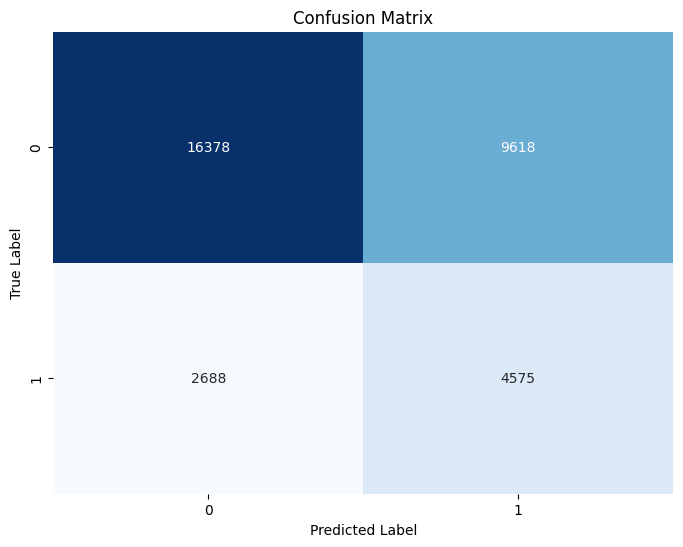

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, pred)

# Plotting using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()